# PeakAffectDS Analysis

## Load Libraries

Here the relevant libraries needed to properly analyze the data are loaded. The Pandas library is used to load the data into dataframes, and the NeuroKit2 library is used to perform most of the transformations on the data.

In [1]:
import numpy as np
import pandas as pd
import neurokit2 as nk
import matplotlib.pyplot as plt
import scipy
import scipy.signal

#import ipympl
#%matplotlib widget

## Importing Data

In [2]:
#
# Load data from subject
#

# Sample subject data paths
s1 = 'Data/RawData/Raw_PID_01-10/01/01-01-03.csv'
s2 = 'Data/RawData/Raw_PID_01-10/02/02-01-03.csv'
s3 = 'Data/RawData/Raw_PID_01-10/03/03-06-03.csv'
s8_6_2 = 'Data/RawData/Raw_PID_01-10/08/08-06-02.csv'
s8_7_2 = 'Data/RawData/Raw_PID_01-10/08/08-07-02.csv'
s8_5_2 = 'Data/RawData/Raw_PID_01-10/08/08-05-02.csv'
s11 = 'Data/RawData/Raw_PID_11-20/11/11-01-06.csv'

# Load and display data stats
sub_dat = pd.read_csv(s1)
print('rows =', len(sub_dat.index))
sub_dat.head()

rows = 122733


,Time,EMG_zyg,EMG_cor,ECG,Respiration,Events
0,0.0005,0.078735,0.029907,0.253601,-0.346985,0.0
1,0.0010,0.076904,0.036926,0.246582,-0.346985,0.0
2,0.0015,0.094910,0.048828,0.238342,-0.347290,0.0
3,0.0020,0.099182,0.055847,0.228577,-0.347290,0.0
4,0.0025,0.092773,0.058899,0.218811,-0.347595,0.0


## Processing Data

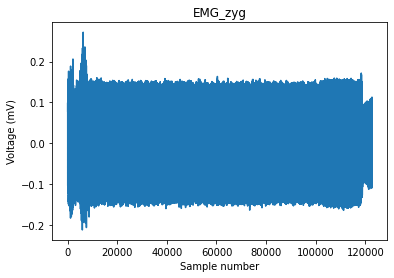

In [3]:
#
# Plot EMG_zyg
#

# Plot the EMG_zyg column
plt.clf()
plt.plot(sub_dat['EMG_zyg'])
plt.xlabel('Sample number')
plt.ylabel('Voltage (mV)')
plt.title('EMG_zyg')
plt.show()

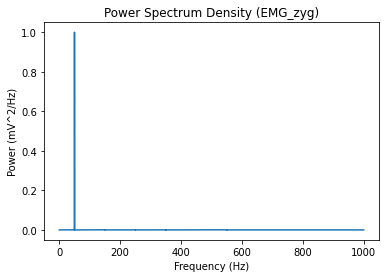

In [4]:
#
# Construct PSD for EMG_zyg
#

# Create PSD for EMG_zyg
psd_emg_zyg = nk.signal_psd(sub_dat['EMG_zyg'], sampling_rate=2000)

# Plot PSD graph
plt.clf()
plt.plot(psd_emg_zyg['Frequency'], psd_emg_zyg['Power'])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (mV^2/Hz)')
plt.title('Power Spectrum Density (EMG_zyg)')
plt.show()

In [5]:
#
# Define functions to filter data
#

# Apply a notch filter to input data
#          data <- Data to apply filter to
#          freq <- Frequency to filter out
#             Q <- Quality score for filter
# sampling_rate <- Sampling rate of data
def apply_notch_filter(data, freq, Q, sampling_rate):
    # Normalize filtering frequency
    nyq_freq = sampling_rate / 2
    norm_freq = freq / nyq_freq
    
    # Use scipy notch filter using normalized frequency
    b, a = scipy.signal.iirnotch(norm_freq, Q)
    filtered_data = scipy.signal.lfilter(b, a, data)
    
    return filtered_data

# Zoom in on a frequency range of a < frequency < b in the data
# data <- Data to zoom in on
#    a <- Lower range value
#    b <- Upper range value
def zoomIn(data, a, b):
    data = data[data['Frequency'] >= a]
    data = data[data['Frequency'] <= b]
    return data

sampling_rate = 2000

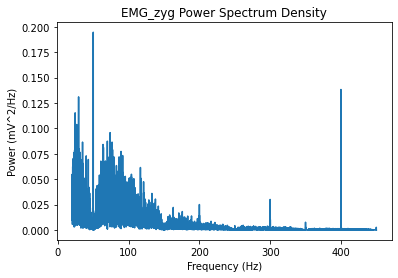

In [6]:
#
# Construct filtered PSD for EMG_cor
#

# Define the frequencies to filter and the Q-factors to use for each
Hzs = [50, 150, 250, 350, 450, 550, 650, 750, 850, 950]
Qs =  [ 5,  25,  25,  25,  25,  25,  25,  25,  25,  25]

# Apply notch filters to each specified frequency
zyg = sub_dat['EMG_cor']
for i in range(len(Hzs)):
    zyg = apply_notch_filter(zyg, Hzs[i], Qs[i], sampling_rate)

# Create PSD graph and only display frequencies in 20 - 450 Hz range
psd = nk.signal_psd(zyg, sampling_rate=sampling_rate)
psd = zoomIn(psd, 20, 450)

# Plot PSD graph
plt.clf()
plt.plot(psd['Frequency'], psd['Power'])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (mV^2/Hz)')
plt.title('EMG_zyg Power Spectrum Density')
#plt.ylim(top=0.2)
plt.show()

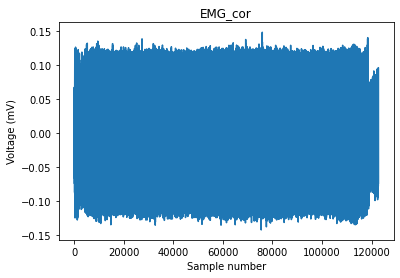

In [69]:
#
# Plot EMG_cor
#

plt.plot(sub_dat['EMG_cor'])
plt.xlabel('Sample number')
plt.ylabel('Voltage (mV)')
plt.title('EMG_cor')
plt.show()

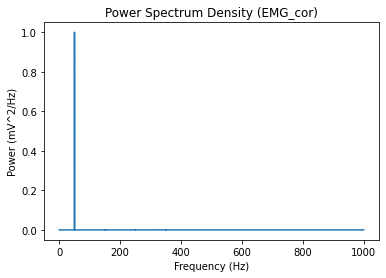

In [70]:
#
# Construct PSD for EMG_cor
#

psd_emg_cor = nk.signal_psd(sub_dat['EMG_cor'], sampling_rate=2000)

plt.plot(psd_emg_cor['Frequency'], psd_emg_cor['Power'])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (mV^2/Hz)')
plt.title('Power Spectrum Density (EMG_cor)')
plt.show()

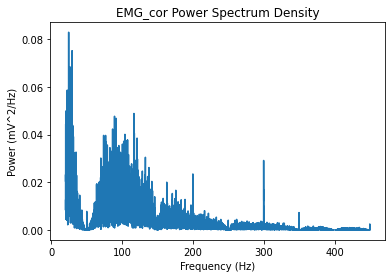

In [71]:
#
# Construct filtered PSD for EMG_cor
#

Hzs = [50, 150, 250, 350, 400, 450, 550, 650, 750, 850, 950]
Qs =  [ 1,  25,  25,  25,  25,  25,  25,  25,  25,  25,  25]

cor = sub_dat['EMG_cor']
for i in range(len(Hzs)):
    cor = apply_notch_filter(cor, Hzs[i], Qs[i], sampling_rate)

psd = nk.signal_psd(cor, sampling_rate=sampling_rate)
psd = zoomIn(psd, 20, 450)
    
plt.clf()
plt.plot(psd['Frequency'], psd['Power'])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (mV^2/Hz)')
plt.title('EMG_cor Power Spectrum Density')
plt.show()

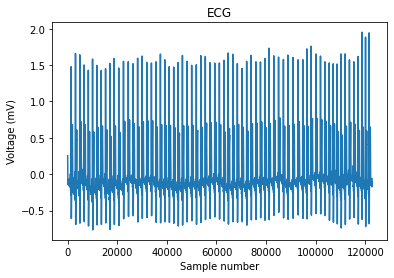

In [72]:
#
# Plot ECG
#

plt.clf()
plt.plot(sub_dat['ECG'])
plt.xlabel('Sample number')
plt.ylabel('Voltage (mV)')
plt.title('ECG')
plt.show()

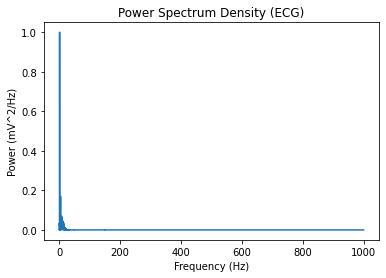

In [73]:
#
# Construct PSD for ECG
#

psd_ecg = nk.signal_psd(sub_dat['ECG'], sampling_rate=2000)

plt.clf()
plt.plot(psd_ecg['Frequency'], psd_ecg['Power'])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (mV^2/Hz)')
plt.title('Power Spectrum Density (ECG)')
plt.show()

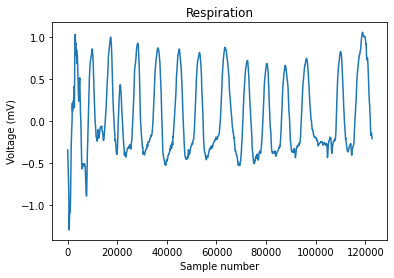

In [74]:
#
# Plot Respiration
#

plt.clf()
plt.plot(sub_dat['Respiration'])
plt.xlabel('Sample number')
plt.ylabel('Voltage (mV)')
plt.title('Respiration')
plt.show()

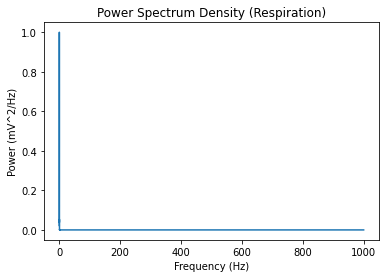

In [75]:
#
# Construct PSD for Respiration
#

psd_resp = nk.signal_psd(sub_dat['Respiration'], sampling_rate=2000)

plt.clf()
plt.plot(psd_resp['Frequency'], psd_resp['Power'])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (mV^2/Hz)')
plt.title('Power Spectrum Density (Respiration)')
plt.show()

### Misc. Code

Extra code that currently has no purpose other than for testing

Creating RawArray with float64 data, n_channels=4, n_times=167742
    Range : 0 ... 167741 =      0.000 ...    83.871 secs
Ready.


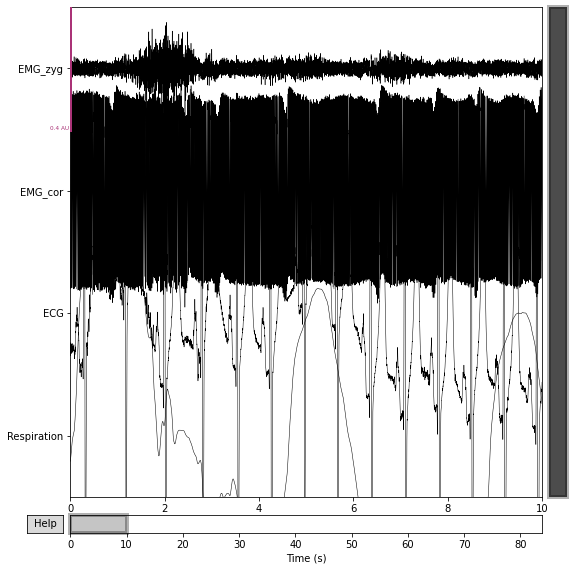

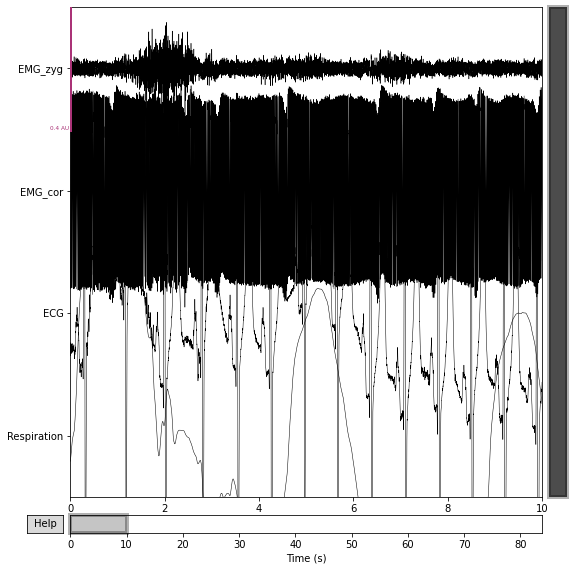

In [3]:
#
# Experimental code to generate a Power Spectrum Density graph using the
# MNE package
#

import mne
from mne.minimum_norm import read_inverse_operator, compute_source_psd

data = pd.read_csv('Data/Raw_PID_01-10/08/08-06-02.csv',
                  usecols=[1, 2, 3, 4])

ch_names = ['EMG_zyg', 'EMG_cor', 'ECG', 'Respiration']

sfreq = 2000
info = mne.create_info(ch_names = ch_names, sfreq = sfreq)
raw = mne.io.RawArray(data.transpose(), info)
raw.plot()


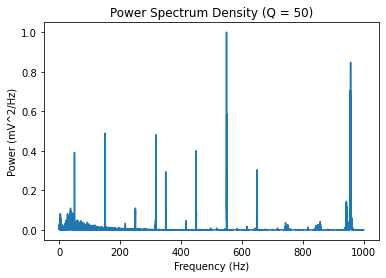

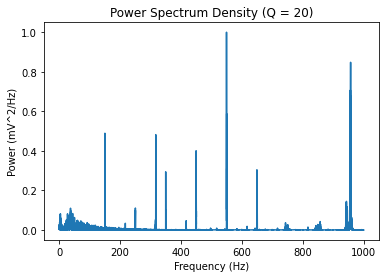

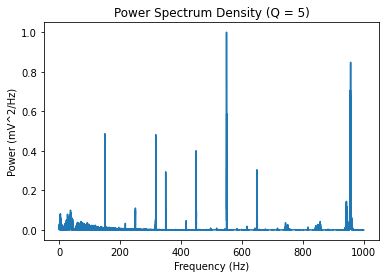

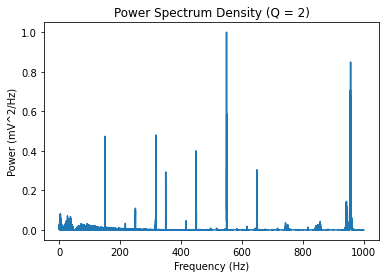

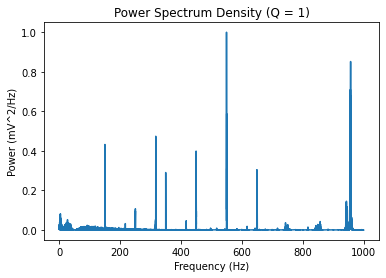

In [9]:
#
# A series of filters experimenting with different Q-factors
#

for Q in [50, 20, 5, 2, 1]:
    zyg = apply_notch_filter(sub_dat['EMG_zyg'], 50, Q, sampling_rate)
    psd = nk.signal_psd(zyg, sampling_rate=sampling_rate)
    
    plt.clf()
    plt.plot(psd['Frequency'], psd['Power'])
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power (mV^2/Hz)')
    plt.title('Power Spectrum Density (Q = ' + str(Q) + ')')
    plt.show()

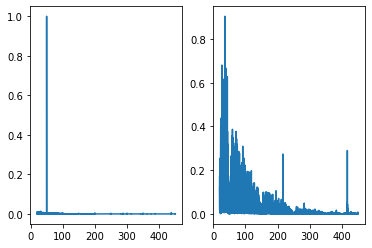

In [35]:
#
# Explore Subjects 8 and 11
#

s8_6_2 = pd.read_csv('Data/Raw_PID_01-10/08/08-06-02.csv')
s8_1_1 = pd.read_csv('Data/Raw_PID_01-10/08/08-01-01.csv')

Hzs = [50, 150, 250, 350, 400, 450, 550, 650, 750, 850, 950, 317]
Qs =  [ 10,  25,  25,  25,  25,  25,  25,  25,  25,  25,  25,  50]

for i in range(len(Hzs)):
    s8_6_2['EMG_zyg'] = apply_notch_filter(s8_6_2['EMG_zyg'], Hzs[i], Qs[i], sampling_rate)
    s8_1_1['EMG_cor'] = apply_notch_filter(s8_1_1['EMG_cor'], Hzs[i], Qs[i], sampling_rate)
    
s8_6_2 = nk.signal_psd(s8_6_2['EMG_zyg'], sampling_rate=2000)
s8_1_1 = nk.signal_psd(s8_1_1['EMG_cor'], sampling_rate=2000)
    
s8_6_2 = zoomIn(s8_6_2, 20, 450)
s8_1_1 = zoomIn(s8_1_1, 20, 450)
    
fig, axs = plt.subplots(1, 2)
axs[0].plot(s8_1_1['Frequency'], s8_1_1['Power'])
axs[1].plot(s8_6_2['Frequency'], s8_6_2['Power'])

Not an outlier


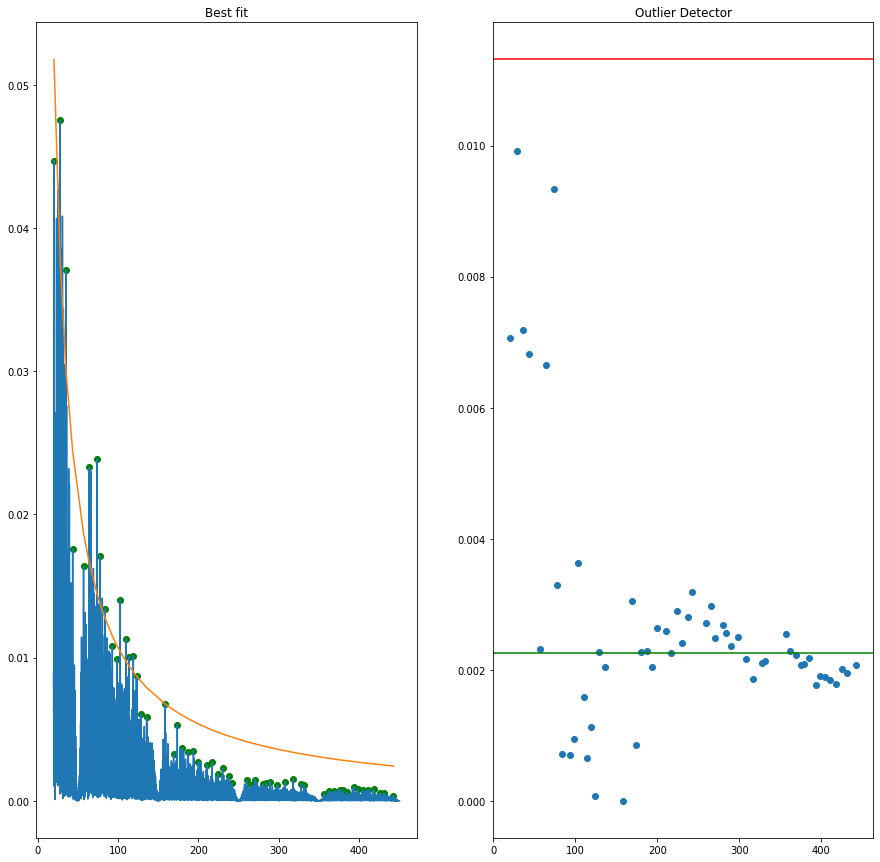

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import argrelextrema
import scipy.optimize

# Load and clean data
#s1 = pd.read_csv('Data/RawData/Raw_PID_01-10/01/01-01-03.csv')
s1 = pd.read_csv('Data/RawData/Raw_PID_01-10/05/05-01-03.csv')

Hzs = [50, 150, 250, 350, 450, 550, 650, 750, 850, 950]
Qs =  [ 5,  25,  25,  25,  25,  25,  25,  25,  25,  25]
for i in range(len(Hzs)):
    s1['EMG_zyg'] = apply_notch_filter(s1['EMG_zyg'], Hzs[i], Qs[i], sampling_rate)
    s1['EMG_cor'] = apply_notch_filter(s1['EMG_cor'], Hzs[i], Qs[i], sampling_rate)
    
# Generate psd
s1_psd = nk.signal_psd(s1['EMG_zyg'], sampling_rate=2000)
s1_psd = zoomIn(s1_psd, 20, 450)

# Find local maxima (create a 'max' column)
n = 200
s1_psd['max'] = s1_psd.iloc[argrelextrema(s1_psd['Power'].values, np.greater_equal,
                    order=n)[0]]['Power']

# Filter out non-maxima values (not null 'max' entries)
best_fit = s1_psd[s1_psd['max'].notnull()]

#
# Try to make a line of best fit
#

p_params = 1
q_params = 2

# Define rational function where p and q are polynomials
def rational(x, *params):
    p = params[:p_params]
    q = params[p_params:]
    return np.polyval(p, x) / np.polyval(q, x)

# Initial guess for P(x) and Q(x)
# Assuming P is 2nd degree and Q is 1st degree
p_init = np.poly1d(np.ones(p_params))
q_init = np.poly1d(np.ones(q_params))

# Stack parameters to optimize
params_init = np.hstack((p_init.coeffs, q_init.coeffs))

# Fit the line
params_best, params_covariance = scipy.optimize.curve_fit(
    rational, best_fit['Frequency'], best_fit['Power'], p0=params_init)

# Get coefficients for P(x) and Q(x)
p_best = params_best[:len(p_init.coeffs)]
q_best = params_best[len(q_init.coeffs):]

# Get x/y values
x_values = best_fit['Frequency']
y_values = rational(x_values, *params_best)

# Find differences between actual values and best fit values
diffs = abs(y_values - best_fit['Power'])

# Get median and max
med_fit = np.median(diffs)
max_fit = np.max(diffs)

# Set threshold
threshold = 5

# Determine if the plot has an outlier
if max_fit > med_fit * threshold:
    print('Outlier')
else:
    print('Not an outlier')

fig, axs = plt.subplots(1, 2, figsize=(15,15))

axs[0].title.set_text('Best fit')
axs[0].plot(s1_psd['Frequency'], s1_psd['Power'])
#axs[0].plot(best_fit['Frequency'], best_fit['Power'])
axs[0].scatter(s1_psd['Frequency'], s1_psd['max'], c='g')
axs[0].plot(x_values, y_values)

axs[1].title.set_text('Outlier Detector')
axs[1].scatter(best_fit['Frequency'], list(diffs))
axs[1].axhline(y=med_fit, c='g')
axs[1].axhline(y=med_fit * threshold, c='r')